In [1]:
# write a file (open w/o context manager)
f = open("test.txt", "w")
f.write("hello\n")
f.write("hello second time")
# your_custom_function(f)
f.close()

In [2]:
with open("rosetta_partial.fasta", "w") as f2:
    f2.write(">JB_007 Rosetta partial genome\n")
    f2.write("ATG\n")
    f2.write("GGA\n")
    f2.write("TGC\n")

In [3]:
# check file existence (exits/isfile)
import os
if os.path.exists("test.txt"):
    print("file exists")
else:
    print("file does not exist")

file exists


In [4]:
# print file's content (loop on lines/readlines/readline)
f = open("test.txt", "r")
print(f.read())
f.close()

hello
hello second time


In [5]:
with open("rosetta_partial.fasta", "r") as f:
    for line in f:
        line = line.rstrip('\n')
        print(line)

>JB_007 Rosetta partial genome
ATG
GGA
TGC


# Exercise 1

open a file in fasta format
read it line by line (except the first one that starts with >)
remove the newline characters and concatenate into a single string
the filename has to be asked through the input function

In [6]:
# try the exercise also with this file https://tinyurl.com/42bcput4
filename = input("Type the filename")
file_content = []
with open(filename, "r") as f:
    for line in f:
        if not line.startswith(">"):
            line = line.rstrip('\n')
            file_content.append(line)
''.join(file_content)

Type the filenameusa.fasta


'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTC

# Exercise 2

write a program that reads the file, stores the sequence without white characters (spaces, end of line) and prints the number of nucleotides in the shared file

In [7]:
# try the exercise also with this file https://tinyurl.com/42bcput4
# or use the file "seq.txt" inside the WeBeep course directory > Exercises
file_path = "sars_cov_2_genome.fasta"
nucleotides = ""
with open(file_path, 'r') as f:
    print("Genome:", f.readline())
    for line in f:
        nucleotides += line.rstrip('\n').strip()
print("NC_045512.2 Severe acute respiratory syndrome coronavirus 2 has ", len(nucleotides))

Genome: >NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome

NC_045512.2 Severe acute respiratory syndrome coronavirus 2 has  29903


# Exercise 3

print the location of the first appearance of the start codon ATG and one of the stop codon (TAA, TAG, TGA) afterwards
use the same file as before https://tinyurl.com/42bcput4

In [8]:
start_codon_index = nucleotides.find("ATG")
print("The first codon starts at index", start_codon_index)
stop_codons = ["TAA", "TAG", "TGA"]
stop_codon_index = [nucleotides[start_codon_index:].find(codon) for codon in stop_codons]
stop_codon_index = [p + start_codon_index for p in stop_codon_index]
for c in range(len(stop_codons)):
    print(f"Position of stop codon {stop_codons[c]} is {stop_codon_index[c]}")
first_stop_codon = min(stop_codon_index)

print(f"Gene starts at {start_codon_index} and stops at {first_stop_codon}\n"
      f"Gene sequence is\n"
      f"{nucleotides[start_codon_index:first_stop_codon]}")

The first codon starts at index 106
Position of stop codon TAA is 129
Position of stop codon TAG is 111
Position of stop codon TGA is 153
Gene starts at 106 and stops at 111
Gene sequence is
ATGCT


# Exercise 4

download https://tinyurl.com/8vzhaad5
write a program that reads these files and saves the sequences as strings.
It should compare the nucleotides in the two files and print the location where they differ along with the differences

If the sequences have different lengths, compare up to the length of the shortest one

In [9]:
usa_file = "usa.fasta"
wuhan_file = "wuhan.fasta"

with open(usa_file, "r") as usa:
    usa.readline()
    usa_seq = ''.join([l.strip('\n') for l in usa])

with open(wuhan_file, "r") as wuhan:
    wuhan.readline()
    wuhan_seq = ''.join([l.strip('\n') for l in wuhan])

print(f"lenght of the sequence: USA: {len(usa_seq)} - WUHAN {len(wuhan_seq)}")

idx = 0
for t in zip(usa_seq, wuhan_seq):
    if t[0] != t[1]:
        print(f"Mutation at {idx}: {t[0]} -> {t[1]}")
    idx += 1

print("")
for i in range(  min( len(usa_seq), len(wuhan_seq) )  ):
    m1 = usa_seq[i]
    m2 = wuhan_seq[i]
    if m1 != m2:
        print(f"Mutation at {i}: {m1} -> {m2}")



lenght of the sequence: USA: 29882 - WUHAN 29903
Mutation at 8781: T -> C
Mutation at 18059: T -> C
Mutation at 28143: C -> T

Mutation at 8781: T -> C
Mutation at 18059: T -> C
Mutation at 28143: C -> T


Exercise 5 will be addressed on the next suitable occasion

# Exercise 6


In [10]:
import math
import matplotlib.pyplot as plt

ages = []
males_ages = []
females_ages = []
with open("titanic.tsv", "r") as f:
    header_line = f.readline().rstrip('\n').split('\t')
    columns = list(zip(      range(len(header_line))   , header_line      ))
    print( columns)
    for line in f:
        line_list = line.rstrip('\n').split('\t')
        gender = line_list[4]
        age = line_list[5]
        if age:
            age = float(age)
            ages.append(age)

            if gender == "male":
                males_ages.append(age)
            elif gender == "female":
                females_ages.append(age)

[(0, 'PassengerId'), (1, 'Survived'), (2, 'Pclass'), (3, 'Name'), (4, 'Sex'), (5, 'Age'), (6, 'SibSp'), (7, 'Parch'), (8, 'Ticket'), (9, 'Fare'), (10, 'Cabin'), (11, 'Embarked')]


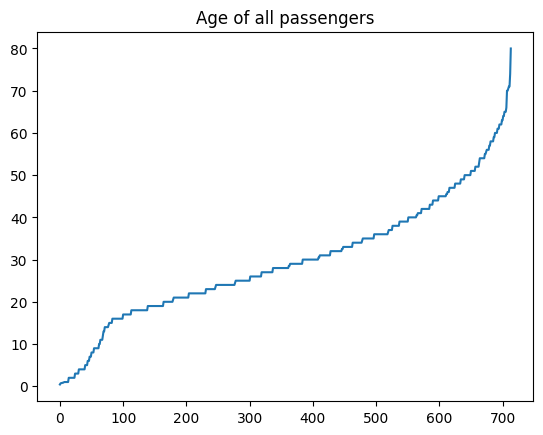

In [11]:
plt.figure()
plt.plot(range(len(ages)), sorted(ages))
plt.title("Age of all passengers")
plt.show()

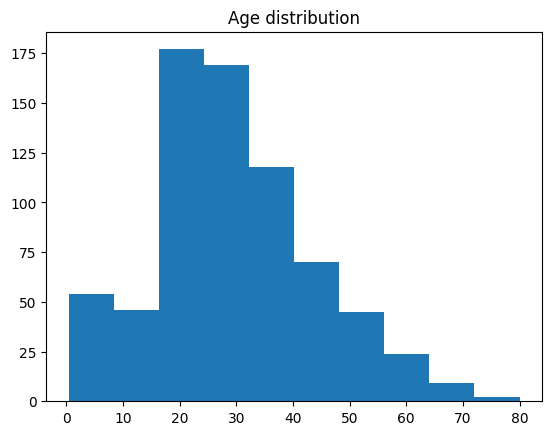

In [12]:
plt.figure()
plt.hist(ages)
plt.title("Age distribution")
plt.show()

Text(0.5, 1.0, 'Box plot comparing ages of passengers between males and females')

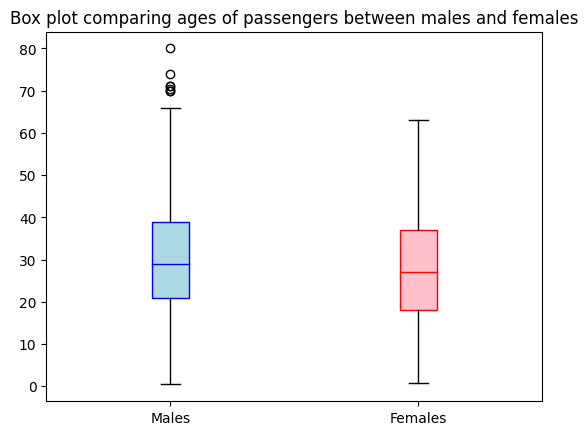

In [13]:
plt.figure()
plt.boxplot(males_ages, positions=[1], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='blue'))
plt.boxplot(females_ages, positions=[2], patch_artist=True, boxprops=dict(facecolor='pink', color='red'), medianprops=dict(color='red'))

plt.xticks([1,2], ["Males", "Females"])
plt.title("Box plot comparing ages of passengers between males and females")

# Homework

### Files
Suppose you have available a fasta file containing a sequence of nucleotides. Read the file and using list comprehension, built the list of amino-acids present in the file. Print the number of amino-acids present in the sequence and for each amino-acid, the number of occurrences.

### Data visualization 1
Write a Python program that load penguins dataset ('penguins.tsv'), then make two scatter plots to see if there are differences in the bill length (x-axis) and bill depth (y-axis) between penguins of different sex and specie.

### Data visualization 2
Write a python program that writes a file with a list of dictionary in the form {x: ..., y:...}. The list should contain 500 unique elements, where each dictionary should contain two random numbers (the values of 'x' and 'y') between 0 and 100. Then visualize the distribution of these data.